## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [1]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

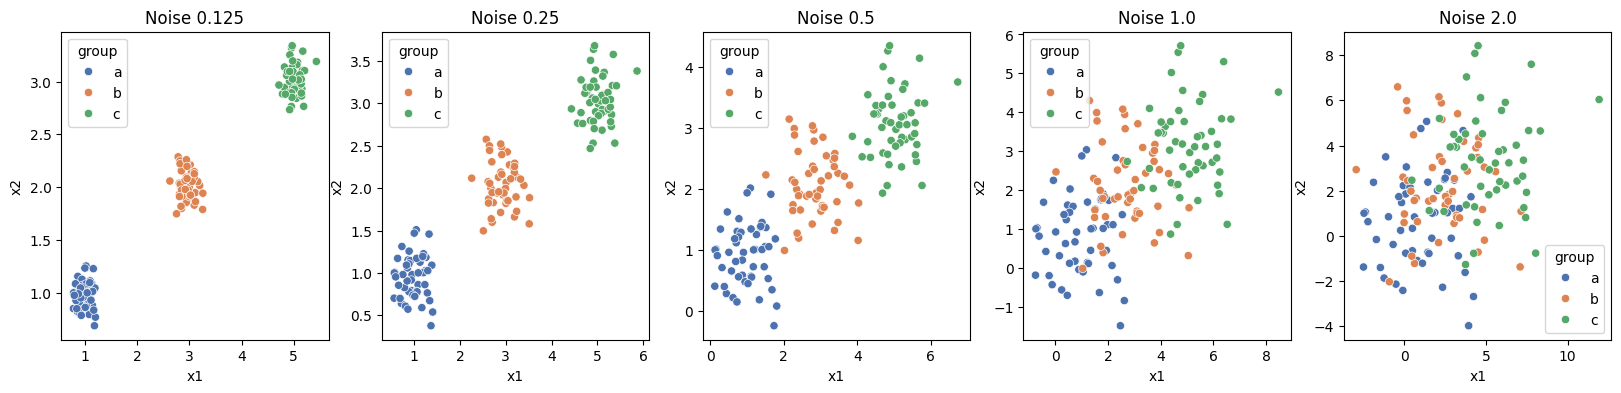

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

datasets = {
    "Noise 0.125": df0_125,
    "Noise 0.25": df0_25,
    "Noise 0.5": df0_5,
    "Noise 1.0": df1_0,
    "Noise 2.0": df2_0
}

fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for ax, (title, df) in zip(axes, datasets.items()):
    sns.scatterplot(data=df, x="x1", y="x2", hue="group", ax=ax, palette="deep")
    ax.set_title(title)

plt.show()

The visual distinctness decreases when noise increases

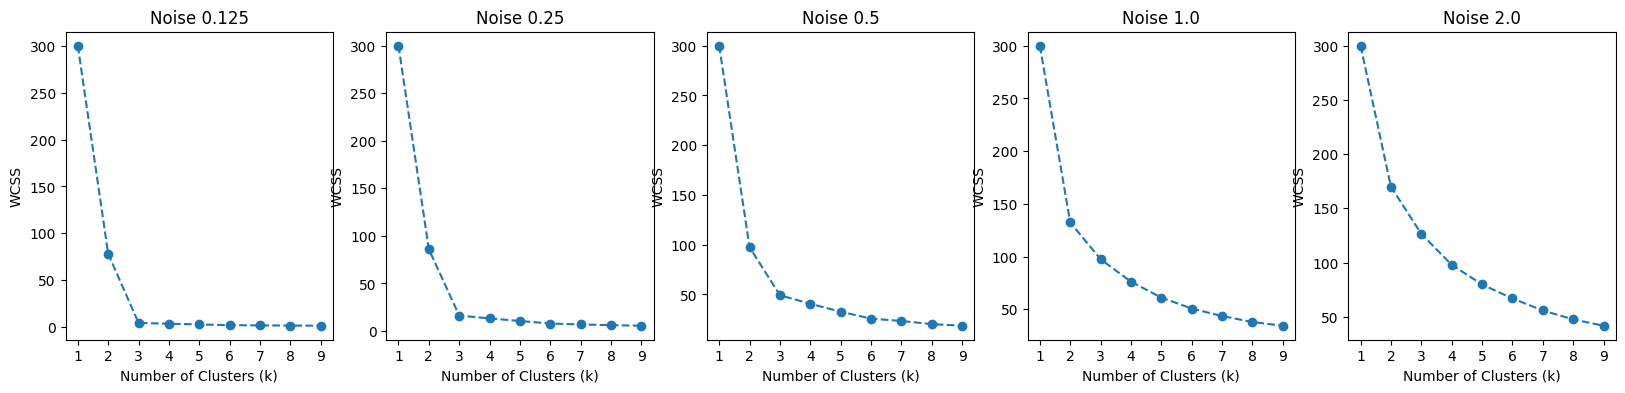

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def plot_scree(df, title, ax):
    X = df[['x1', 'x2']].values
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    wcss = []
    K = range(1, 10)  # Test for k from 1 to 9
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=100, n_init=10)
        kmeans.fit(X_scaled)
        wcss.append(kmeans.inertia_)

    ax.plot(K, wcss, marker="o", linestyle="--", label=title)
    ax.set_xticks(K)
    ax.set_xlabel("Number of Clusters (k)")
    ax.set_ylabel("WCSS")
    ax.set_title(title)

fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for ax, (title, df) in zip(axes, datasets.items()):
    plot_scree(df, title, ax)

plt.show()


The elbow method works by identifying the point where adding more clusters does not significantly decrease WCSS.

Low noise: The optimal k is clear because clusters are compact and well-separated. For example in Noise 0.125, k=3, we can see afterwards that there is a strong elbow where it decreases just barely after k=3.

High noise: WCSS decreases gradually, meaning clusters are not as distinct, and selecting k is less obvious. For example, noise = 2 has a gradual curve, making it hard to see the k. Could be k=6

This numerical simulation shows that when data is noisy, clustering becomes harder, and choosing k requires additional validation methods like the silhouette score or gap statistic.


**Q4.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

In [9]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#question 1
file_path = "data/airbnb_hw.csv"
df = pd.read_csv(file_path)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Host Id                     30478 non-null  int64  
 1   Host Since                  30475 non-null  object 
 2   Name                        30478 non-null  object 
 3   Neighbourhood               30478 non-null  object 
 4   Property Type               30475 non-null  object 
 5   Review Scores Rating (bin)  22155 non-null  float64
 6   Room Type                   30478 non-null  object 
 7   Zipcode                     30344 non-null  float64
 8   Beds                        30393 non-null  float64
 9   Number of Records           30478 non-null  int64  
 10  Number Of Reviews           30478 non-null  int64  
 11  Price                       30478 non-null  object 
 12  Review Scores Rating        22155 non-null  float64
dtypes: float64(4), int64(3), object

In [8]:
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [10]:
df["Price"] = df["Price"].replace('[\$,]', '', regex=True).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\bridget\AppData\Local\Temp\ipykernel_25828\1185406313.py:1: SyntaxWarning: invalid escape sequence '\$'
  df["Price"] = df["Price"].replace('[\$,]', '', regex=True).astype(float)


In [ ]:
#question2
df_filtered = df[['Beds', 'Number Of Reviews', 'Review Scores Rating', 'Price']].dropna()

In [ ]:
#quesion3
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
df_filtered['Cluster'] = kmeans.fit_predict(df_filtered[['Beds', 'Number Of Reviews', 'Review Scores Rating']])


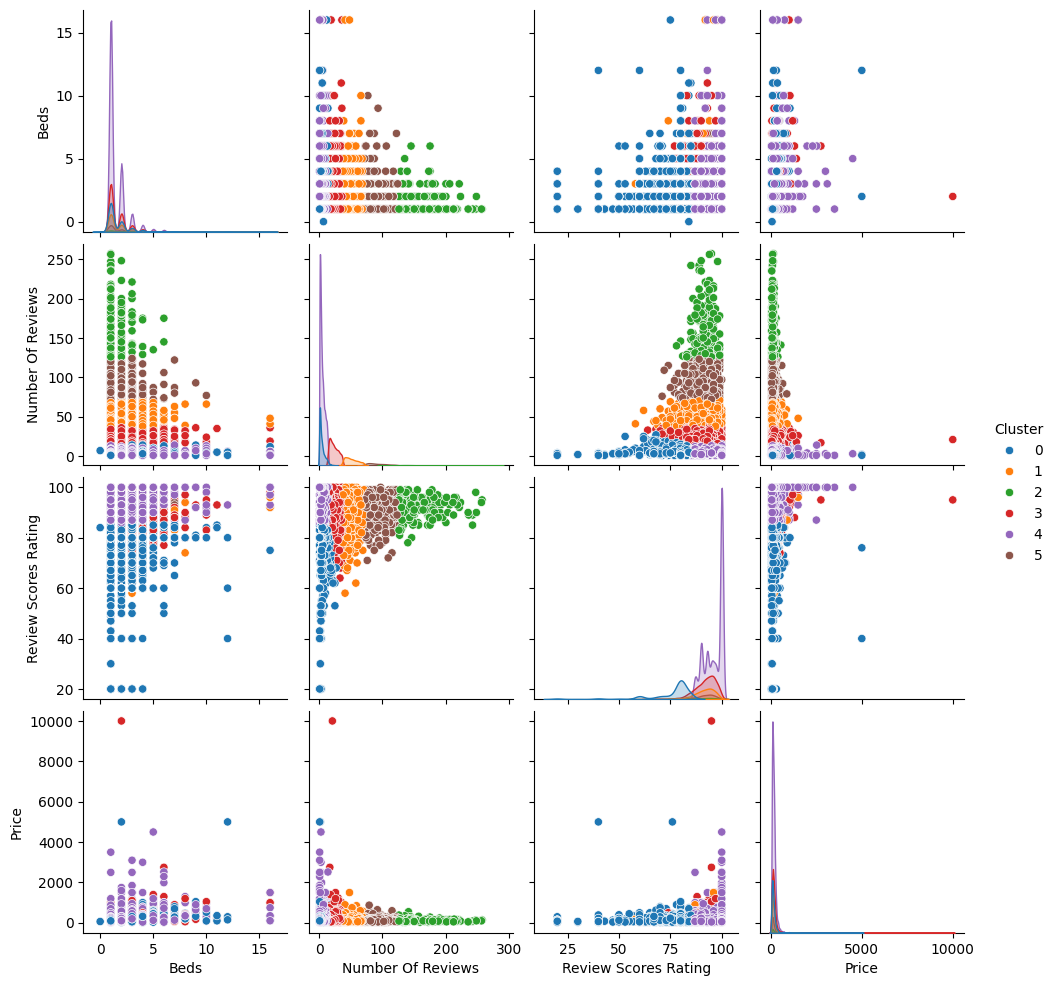

In [ ]:
#4
sns.pairplot(df_filtered, hue='Cluster', diag_kind='kde', palette='tab10')
plt.show()

In [ ]:
#5
cluster_prices = df_filtered.groupby('Cluster')['Price'].describe()
print(cluster_prices)

           count        mean         std   min   25%    50%    75%      max
Cluster                                                                    
0         2926.0  138.264525  160.718610  21.0  70.0  105.0  170.0   5000.0
1         1896.0  147.249473   96.206465  22.0  89.0  125.0  180.0   1500.0
2          173.0  125.768786   71.312885  33.0  79.0  100.0  165.0    550.0
3         4205.0  162.367895  194.847092  20.0  88.0  135.0  195.0  10000.0
4        12174.0  158.957697  137.342408  10.0  85.0  130.0  195.0   4500.0
5          737.0  134.791045   84.217835  27.0  80.0  115.0  165.0    875.0


In [ ]:
#6
wcss = []
k_values = range(1, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_filtered[['Beds', 'Number Of Reviews', 'Review Scores Rating']])
    wcss.append(kmeans.inertia_)

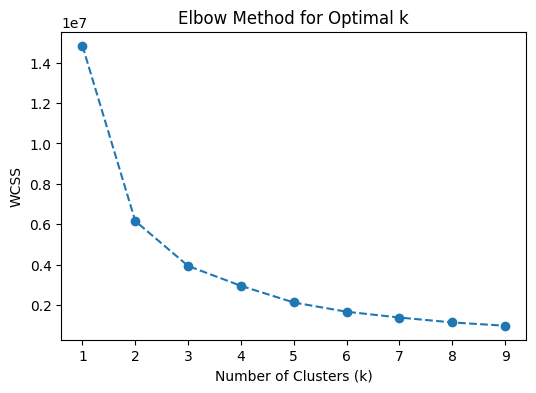

In [16]:
plt.figure(figsize=(6,4))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

In [22]:
#optimal k is 4 ish 

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_filtered['Cluster'] = kmeans.fit_predict(df_filtered[['Beds', 'Number Of Reviews', 'Review Scores Rating']])

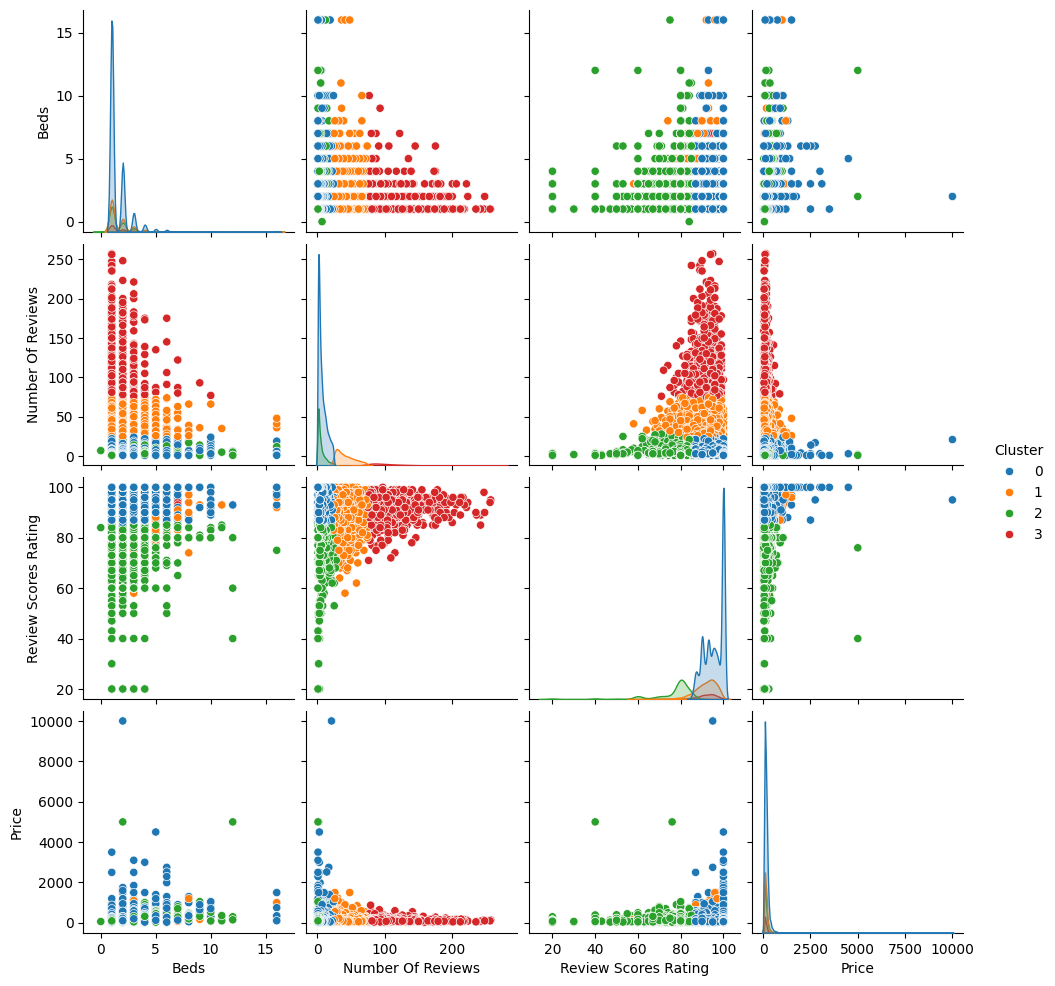

In [23]:
sns.pairplot(df_filtered, hue='Cluster', diag_kind='kde', palette='tab10')
plt.show()

In [24]:
cluster_prices = df_filtered.groupby('Cluster')['Price'].describe()
print(cluster_prices)

           count        mean         std   min   25%    50%    75%      max
Cluster                                                                    
0        14421.0  160.154497  158.698784  10.0  86.0  130.0  195.0  10000.0
1         3708.0  151.885653  106.215065  22.0  89.0  127.0  185.0   1500.0
2         3138.0  139.399936  157.535485  20.0  70.0  109.0  173.5   5000.0
3          844.0  133.337678   82.879028  27.0  80.0  110.0  165.0    875.0
